# Van der Pol equations

In [1]:
import jax.numpy as jnp
from prax import Oscillator
from jax.config import config; config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt

/Users/yoneda/.pyenv/versions/miniforge3-4.10.3-10/lib/python3.9/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
class VanderPol(Oscillator):
    def __init__(self, mu, dt=0.01, eps=10**-5):
        super().__init__(n_dim=2, dt=dt, eps=eps)
        self.mu = mu

    def forward(self, state):
        x, y = state
        vx = y
        vy = self.mu * (1.0 - x*x) * y - x
        return jnp.array([vx, vy])

model = VanderPol(mu=0.2)

6.308876695632844


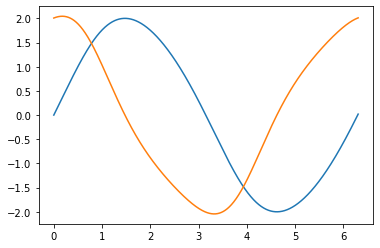

In [3]:
init_val = jnp.array([0.1, 0.2])
model.find_periodic_orbit(init_val)
print(model.period) # 6.3088767
plt.plot(model.ts, model.periodic_orbit)

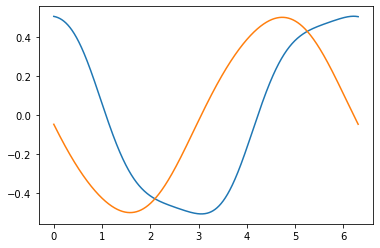

In [4]:
model.calc_phase_response()
plt.plot(model.ts, model.phase_response_curve)